<a href="https://colab.research.google.com/github/mingyuanhua/deeplearning/blob/main/Deep_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/MyDrive'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install virtualenv
!virtualenv venv_d2l
!source venv_d2l/bin/activate

In [ ]:
!source venv_d2l/bin/activate

In [ ]:
!pip install torch==1.12.0
!pip install torchvision==0.13.0

import os
os.system("source venv/bin/activate")


In [ ]:
!mkdir d2l-zh && cd d2l-zh
!curl https://zh-v2.d2l.ai/d2l-zh-2.0.0.zip -o d2l-zh.zip
!unzip -o d2l-zh.zip && rm d2l-zh.zip

In [ ]:
# No GPU or CUDA environment
!pip install mxnet==1.7.0.post1

In [ ]:
import os
path = '/content/drive/MyDrive/d2l-zh'
os.chdir(path)

In [ ]:
#!deactivate

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthenic_data(w, b, num_examples):
  """ generate y = Xw + b + noise """
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthenic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.1297,  1.4356]) 
label: tensor([-2.9333])


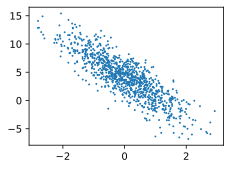

In [ ]:
d2l.set_figsize()
# plot first column of the features
# detach is to use get the data from torch computing package
# and then convert into numpy
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

In [ ]:
def data_iter(batch_size, features, labels):
  """ 该函数接手批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量 """
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    # yield is a python iterator
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-1.2456, -0.0383],
        [ 0.5725, -1.8319],
        [-0.9531, -0.5861],
        [-0.3041,  0.2247],
        [ 1.1336,  0.9394],
        [-0.1287,  1.0123],
        [-1.3818, -0.3328],
        [ 1.5644,  0.6131],
        [-0.7654, -2.6377],
        [-0.3469, -0.3853]]) 
 tensor([[ 1.8374],
        [11.5723],
        [ 4.2829],
        [ 2.8134],
        [ 3.2638],
        [ 0.5079],
        [ 2.5792],
        [ 5.2403],
        [11.6490],
        [ 4.8093]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[ 0.0097],
         [-0.0040]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [ ]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape))**2/2

In [ ]:
# 定义优化算法
# params is a list of all parameters [w, b]
# lr is learning rate
def sgd(params, lr, batch_size):
  """小批量随机梯度下降"""
  with torch.no_grad(): #更新的时候不需要进行梯度计算
    for param in params:
      param -= lr * param.grad / batch_size #因为乘法对梯度来说是线性关系，所有除以size在损失函数里还是这里都是一样的
      param.grad.zero_() #pytorch不会自动把梯度设为0，所以要手动设为0。这里因为是更新数据所以不需要求导

In [ ]:
#训练过程
lr = 0.03 # 超参数
num_epochs = 3 # 整个数据扫三遍
net = linreg # net是我们的模型
loss = squared_loss # loss是我们的损失

# 训练的实现基本上大同小异，就是两层for loop，第一层就是每一次对数据扫一遍，每一次处理一个批量大小的X和y，把X,w,b放到network里面做预测，把预测的y和真实的y来做损失
# 损失就是一个长为批量大小的向量，然后求和算梯度，这样就可以访问梯度了，这样用sgd对[w,b]来进行更新
# 第二层等扫了一遍之后，我们来评价我们的进度，不需要计算梯度，放到no_grad里面，把整个features整个数据传进去计算预测和真实的label做一下损失并print
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y) # x和y的小批量损失
    # 因为l形状是(batch_size, 1), 而不是一个标量，l中的所有元素被加到一起，并以此计算[w, b]的梯度
    l.sum().backward()
    sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000218
epoch 2, loss 0.000048
epoch 3, loss 0.000047


In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0003, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)


In [ ]:
# 可以实验不同超参数的效果。重新训练要把w,b重新随机一次，这样就不会跟着上一次的结果来了
# 学习率不能太小不能太大


In [ ]:
# 线性回归的简洁实现 使用pytorch提供的框架
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [ ]:
# 假设我们已经有了features和labels了，我们可以把它做成一个list，传到一个TensorDataset里面，就是把我们的X,y传进去
# dataset里拿到数据集之后，那么我们可以调用DataLoader函数，每次在里面随机挑选batch_size个样本出来，shuffle是否随机打乱顺序

def load_array(data_arrays, batch_size, is_train=True):
  """"构造一个pytorch数据迭代器"""
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size) # 构造iterator

next(iter(data_iter)) # 通过next函数从iterator得到X和y

[tensor([[ 0.1257, -0.1879],
         [-0.2334, -0.9598],
         [-0.3447, -0.2268],
         [ 0.9314,  0.1462],
         [-0.4593,  1.6504],
         [-0.5867,  0.2891],
         [ 0.2549,  0.1014],
         [-0.8876, -0.9138],
         [-0.3685,  0.7825],
         [-0.2636, -1.3393]]),
 tensor([[ 5.0838],
         [ 6.9867],
         [ 4.2749],
         [ 5.5568],
         [-2.3210],
         [ 2.0468],
         [ 4.3488],
         [ 5.5321],
         [ 0.7975],
         [ 8.2196]])]

In [ ]:
# 使用框架的预定义好的层
# nn是神经网络的缩写
# 输入维度2 输出维度1 线性回归就是一个简单的单层神经网络
# 为了之后方便，把他放到一个sequential的容器里面，可以理解成一个 list of layers，一层一层按照顺序放在一起

from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [ ]:
# 初始化模型参数
# net[0]来访问到这个layer，通过.weight来访问到他的w，data是他的真实data，normal_是使用正态分布太替换掉data的值
# .bias偏差直接设成0
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
# 计算均方误差使用的是MSELoss类，也称为平方L2范数
loss = nn.MSELoss()

In [ ]:
# 实例化SGD示例 传入network里的所有参数包括w和b，并指定学习率
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [ ]:
# 训练模块
# 迭代三个周期，对每一次扫一遍数据，在迭代器里面， 一次一次地把batch小批量拿出来，放进net里面
# 跟之前不一样的地方是net里面自己带了模型参数，所有不用把w和b弄进去了！
# trainer就是我们的优化器告诉我们先把梯度清零，backward计算梯度，这里pytorch已经帮做了sum，有了梯度之后调用step()函数来进行模型更新
# 最后把所有的feature放到模型里面，然后打印一次

num_epochs = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(net(X), y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features), labels)
  print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000245
epoch 2, loss 0.000095
epoch 3, loss 0.000096
